In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

colnames = ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
data     = pd.read_csv('driving_log.csv', skiprows=[0], names=colnames)

Text(0.5, 0, 'Steering angle')

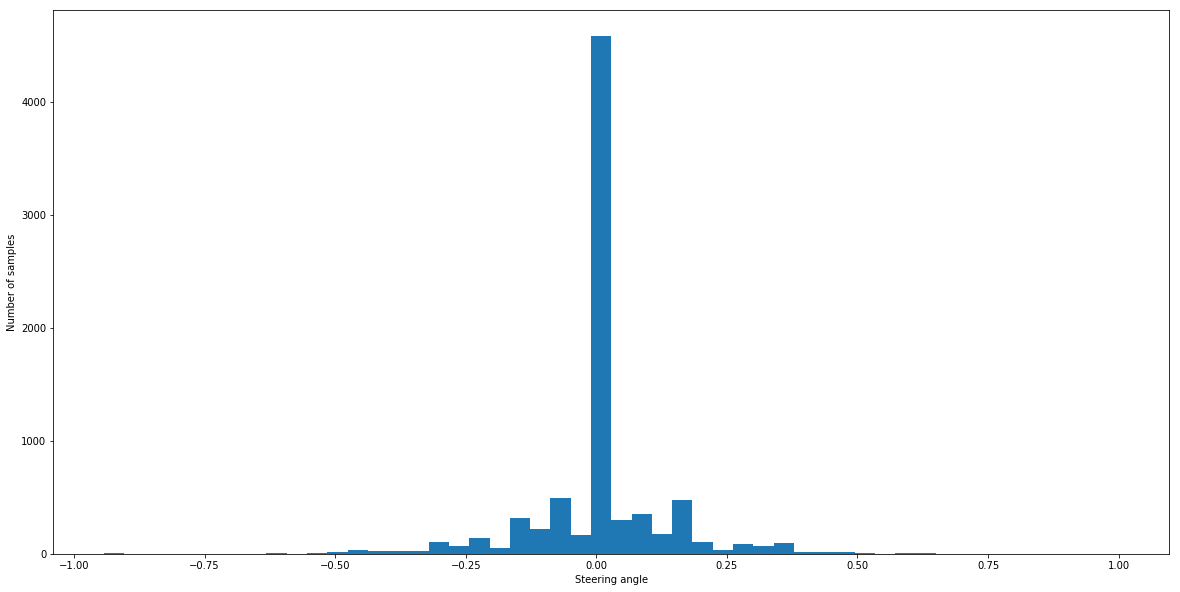

In [2]:
plt.figure(figsize=(20,10))
data['steering'].plot.hist(bins=50)
plt.ylabel('Number of samples')
plt.xlabel('Steering angle')

Text(0.5, 0, 'Steering angle')

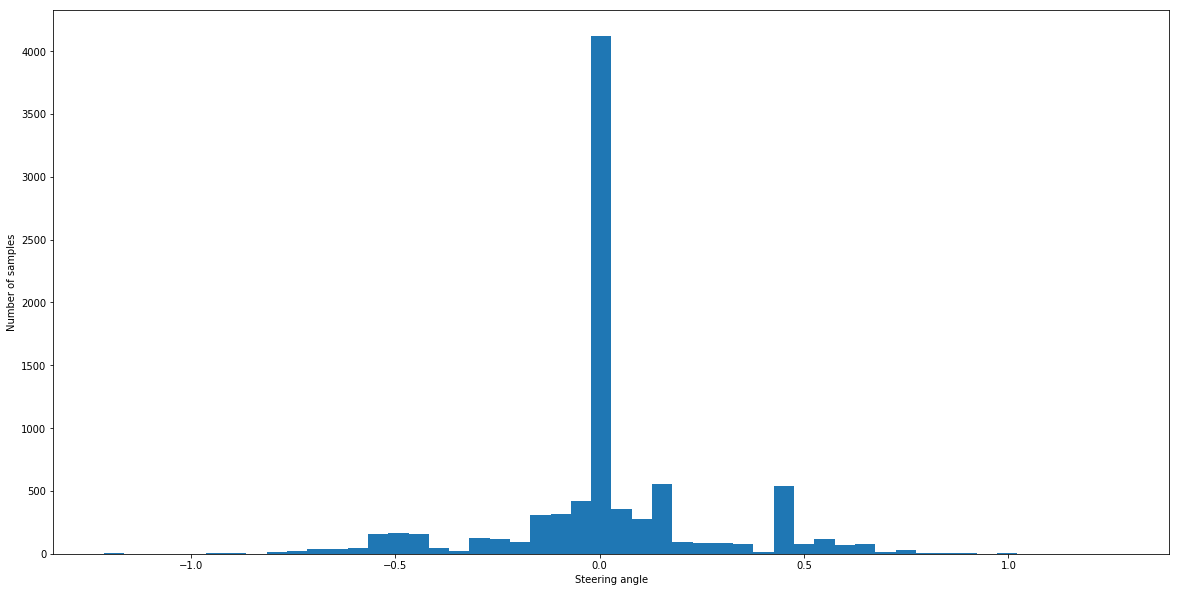

In [18]:
import numpy as np
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


# Constants
steering_adjustment = 0.27

# What determines a turn, Can be done better by taking a mean or some other metric
# of the positive values and in turn for the negative values
turn_thresh         = 0.15
turn_angle_noise    = (-0.10, 0.10)

# Preparing data from driving_log.csv (Sample training data)
colnames = ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
data     = pd.read_csv('driving_log.csv', skiprows=[0], names=colnames)

center = np.array([x.strip() for x in data.center.tolist()])
left = np.array([x.strip() for x in data.left.tolist()])
right = np.array([x.strip() for x in data.right.tolist()])
steering = np.array(data.steering.tolist())

# input_shape = mpimg.imread(center[0]).shape

# Split train and valid
# Shuffle center and steering. Using 10% of center camera images and steering angles for validation.
center_train, X_valid, steering_train, y_valid = train_test_split(center, steering, test_size=0.10, shuffle=True, random_state=100)

center_train = np.array(center_train)
steering_train = np.array(steering_train)

# Filtering going straight, left and right turns
a_right = steering_train[steering_train > turn_thresh]
d_right = center_train[steering_train > turn_thresh]

a_left = steering_train[steering_train < -turn_thresh]
d_left = center_train[steering_train < -turn_thresh]

a_straight = steering_train[(steering_train < turn_thresh ) & (steering_train > -turn_thresh)]
d_straight = center_train[(steering_train < turn_thresh ) & (steering_train > -turn_thresh)]

# To account for the discrepancy in the dataset between the straight, right, left turns
# Since the number of images with steering straight is much higher than the rest,
# turns aren't able to contribute to the CNN weights effectively

# Filter angles less than -turn_thresh and add right camera images into driving left list, with a sharper turn angle
# Left camera images can be added to the left driving list by making a softer turn angle than the center image
# The opposite is done for driving right list
# Could be done better than converting to list but dont have to worry about appending dimensions
a_left = a_left.tolist() + (steering[np.where(steering < -turn_thresh)] - steering_adjustment).tolist()
d_left = d_left.tolist() + (right[np.where(steering < -turn_thresh)]).tolist()

a_right = a_right.tolist() + (steering[np.where(steering > turn_thresh)] + steering_adjustment).tolist()
d_right = d_right.tolist() + (left[np.where(steering > turn_thresh)]).tolist()

# Combine images from center, left and right cameras
X_train = d_straight.tolist() + d_left + d_right
y_train = np.float32(a_straight.tolist() + a_left + a_right)


plt.figure(figsize=(20,10))
plt.hist(y_train, bins=50)
plt.ylabel('Number of samples')
plt.xlabel('Steering angle')



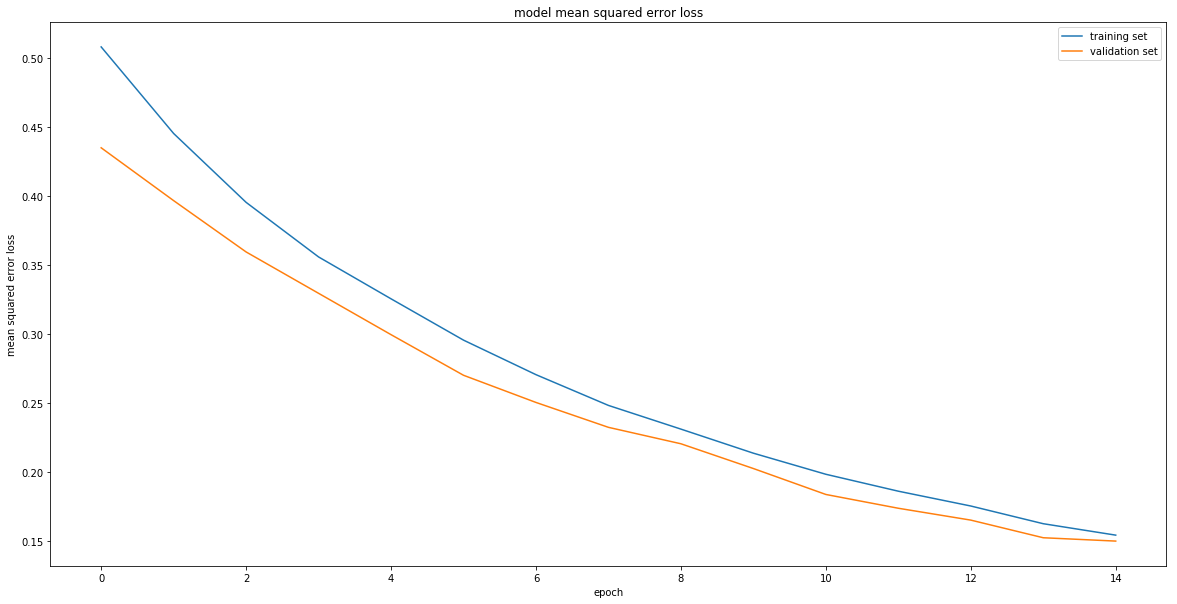

In [17]:
import pickle as p

hist = p.load(open('hist.p','rb'))

### plot the training and validation loss for each epoch
plt.figure(figsize=(20,10))
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()